In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

import numpy as np
import numpy.linalg as la
MEPS = np.finfo(float).eps

import pandas as pd

from scipy.linalg import toeplitz
import scipy.fftpack as fft

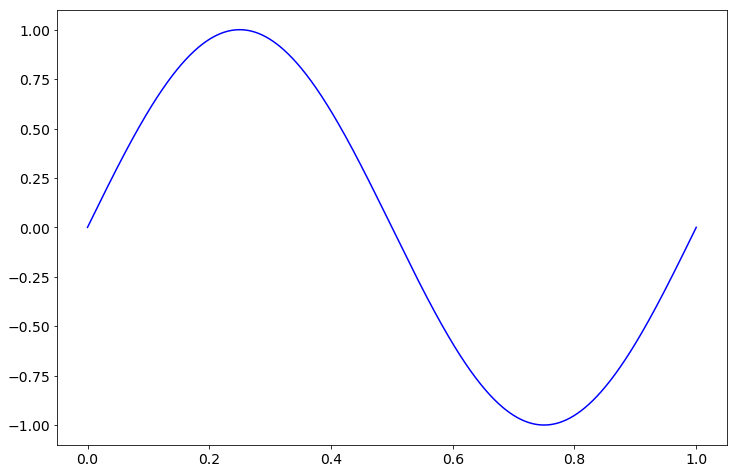

In [248]:
def rbf(r):
    return r**8#*np.log(r+MEPS)

def foo(x):
    #return (x-0)**2 * x*(x-1)
    return(np.sin(2*np.pi*x))

xs = np.linspace(0, 1, 1000)
plt.figure(figsize=(12,8))
plt.plot(xs, foo(xs),'b-')
plt.show()

cond(A) = 2.90003e+19
L^2 error = 0.452057


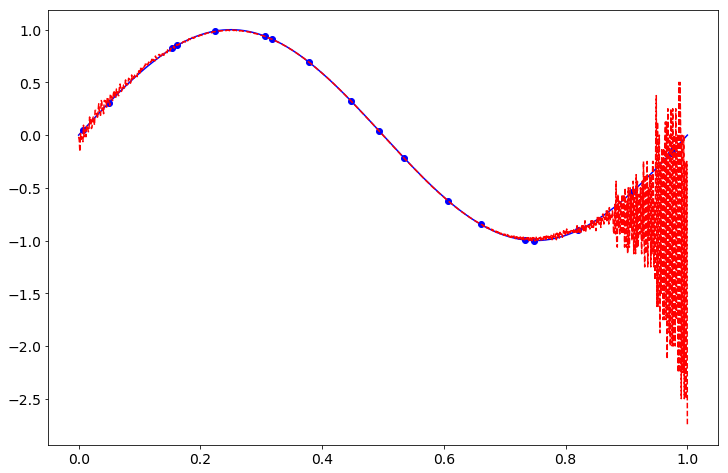

In [259]:
n = 19
m = 1000
np.random.seed(5)
xs = np.linspace(0,1, n) + 1/(3*n) * np.random.randn(n)

dist_mat = np.abs(np.subtract.outer(xs,xs))
A = rbf(dist_mat)
print('cond(A) = %g' % la.cond(A))
fs = foo(xs)
cs = la.solve(A, fs)

zs = np.linspace(0,1,m)
dist_mat = np.abs(np.subtract.outer(zs,xs))
A = rbf(dist_mat)
us = A @ cs

print('L^2 error = %g' % (la.norm(us-foo(zs))/la.norm(foo(zs))) )
plt.figure(figsize=(12,8))
plt.plot(xs, fs, 'bo')
plt.plot(zs, foo(zs), 'b-')
plt.plot(zs, us, 'r--')
plt.show()

In [100]:
def make_mat(n):
    #n = 4
    squares = [i**2 for i in range(n)]
    repeat = squares[:0:-1] + squares
    A = np.array([[repeat[i+j] for i in range(n)] for j in range(n-1,-1,-1)])
    return A

In [110]:
for n in range(3, 20):
    print(la.cond(make_mat(n)))

9.89897948556636
1.7767284075014292e+16
1.2955775568924936e+17
1.0922679315637744e+17
1.4483923261485347e+17
6.332253065697956e+17
3.530166397669e+17
1.9626089121877353e+18
2.0594957215084529e+18
3.484955975843744e+17
1.1984908719188946e+18
1.2892635820118796e+19
1.0006575010778156e+18
4.860151752778861e+17
2.1340950167938286e+18
1.2169903664699382e+19
3.550308364963274e+18


In [111]:
print(la.inv(make_mat(4)))

[[-3.75299969e+14  1.12589991e+15 -1.12589991e+15  3.75299969e+14]
 [ 1.12589991e+15 -3.37769972e+15  3.37769972e+15 -1.12589991e+15]
 [-1.12589991e+15  3.37769972e+15 -3.37769972e+15  1.12589991e+15]
 [ 3.75299969e+14 -1.12589991e+15  1.12589991e+15 -3.75299969e+14]]


In [108]:
la.cond(make_mat(3))

9.89897948556636

In [112]:
print(make_mat(4))

[[0 1 4 9]
 [1 0 1 4]
 [4 1 0 1]
 [9 4 1 0]]


In [117]:
squares = [i**2 for i in range(4)]
toeplitz(squares, squares)

array([[0, 1, 4, 9],
       [1, 0, 1, 4],
       [4, 1, 0, 1],
       [9, 4, 1, 0]])

In [121]:
xs = np.linspace(0,1,5)
A = toeplitz(xs, xs)
B = np.abs(np.subtract.outer(xs,xs))
print(A-B)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [119]:
A

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.25, 0.  , 0.25, 0.5 , 0.75],
       [0.5 , 0.25, 0.  , 0.25, 0.5 ],
       [0.75, 0.5 , 0.25, 0.  , 0.25],
       [1.  , 0.75, 0.5 , 0.25, 0.  ]])

In [120]:
B

array([[ 0.  , -0.25, -0.5 , -0.75, -1.  ],
       [ 0.25,  0.  , -0.25, -0.5 , -0.75],
       [ 0.5 ,  0.25,  0.  , -0.25, -0.5 ],
       [ 0.75,  0.5 ,  0.25,  0.  , -0.25],
       [ 1.  ,  0.75,  0.5 ,  0.25,  0.  ]])

In [156]:
def toep_mult(points, x):
    N = len(x)
    #a = np.block([A[:,0], A[0,:0:-1]] )
    a = np.block([points, points[:0:-1]])
    a_hat = fft.fft(a)
    x_hat = fft.fft(np.block([x, np.zeros(N-1)]))
    b_hat = a_hat * x_hat # * len(a_hat) - Scipy's FFT isn't scaled
    b = fft.ifft(b_hat)
    return b[:N]

def toep_inv(points, b):
    N = len(b)
    #a = np.block([A[:,0], A[0,:0:-1]] )
    a = np.block([points, points[:0:-1]])
    a_hat = fft.fft(a)
    b_hat = fft.fft(np.block([b, np.zeros(N-1)]))
    x_hat = b_hat / a_hat
    x = fft.ifft(x_hat)
    print(x)
    return x[:N]

In [157]:
n = 10
np.random.seed(1)
a = np.random.randn(n)
xs = np.random.randn(n)
print(la.norm( toep_mult(a,xs) - toeplitz(a,a)@xs))

6.437388654330863e-14


In [158]:
n = 10
np.random.seed(1)
a = np.random.randn(n)
xs = np.random.randn(n)
print(la.norm( toep_inv(a,xs) - la.solve(toeplitz(a,a), xs) ) )

[ 0.16443222+0.j -0.25004938+0.j -0.31711685+0.j  0.06172335+0.j
  1.22919897+0.j  0.05996905+0.j -0.55549339+0.j  0.11446923+0.j
  0.1301134 +0.j  0.50253061+0.j  0.28052332+0.j -0.96258566+0.j
 -0.03659981+0.j  0.17173919+0.j -0.26413092+0.j  0.2059216 +0.j
 -0.85643659+0.j -0.15062164+0.j  0.94782855+0.j]
1.7749059806473229


In [207]:
a = [i**2 for i in range(4)]
A = toeplitz(a,a)
A = A[::-1]
print(A)
A = np.array(A, np.float)

A[0] /= A[0,0]
A[1] -= A[1,0]*A[0]
A[2] -= A[2,0]*A[0]
A[3] -= A[3,0]*A[0]

A[1] /= A[1,1]
A[2] -= A[2,1]*A[1]
A[3] -= A[3,1]*A[1]

A[2] /= A[2,2]
A[3] -= A[3,2]*A[2]

print(np.round(A,4))

[[9 4 1 0]
 [4 1 0 1]
 [1 0 1 4]
 [0 1 4 9]]
[[ 1.      0.4444  0.1111  0.    ]
 [-0.      1.      0.5714 -1.2857]
 [ 0.      0.      1.      3.    ]
 [ 0.      0.      0.      0.    ]]


In [174]:
A[0]/9

array([1.        , 0.44444444, 0.11111111, 0.        ])

In [197]:
a = [i**2 for i in range(5)]
A = toeplitz(a,a)
A = A[::-1]
A = np.array(A, np.float)

print(np.sum(A[:], axis=0))

[30. 15. 10. 15. 30.]


In [208]:
from sympy import *

In [209]:
a = symbols('a')

In [216]:
expand(a**4 - (a+1)**4)

-4*a**3 - 6*a**2 - 4*a - 1

In [215]:
expand((a+1)**4 - 1)

a**4 + 4*a**3 + 6*a**2 + 4*a